In [18]:
import os
import random
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
! unzip /content/drive/MyDrive/archive.zip

Archive:  /content/drive/MyDrive/archive.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_

In [8]:
#read the path of folder
folder_path = "/content/flowers"

In [9]:
def load_dataset(folder_path):
  #list all the files from the directory
  file_list = os.listdir(folder_path)
  flowers_images = []
  flowers_labels = []
  for i in range(len(file_list)):
    sub_folder_path = f"{folder_path}/{file_list[i]}"
    images_sub_folder = os.listdir(sub_folder_path)
    for j in range(len(images_sub_folder)):
      img = mpimg.imread(f"{sub_folder_path}/{images_sub_folder[j]}") 
      flowers_images.append(img)
      flowers_labels.append(file_list[i])

  return flowers_images, flowers_labels


In [10]:
flowers_images, flowers_labels = load_dataset(folder_path)

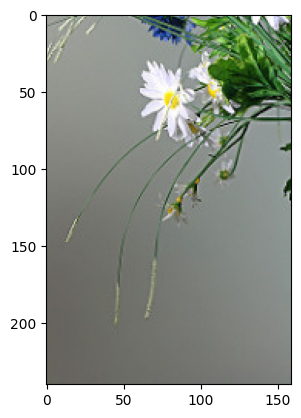

In [11]:
img = flowers_images[733]
plt.imshow(img)

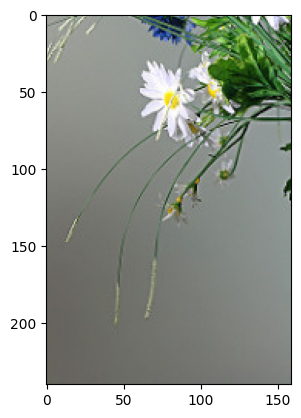

In [12]:
selected_part = img[:240, 0:240, :] 
plt.imshow(selected_part)

In [13]:
def resize_images(flowers_images):
  resized_images = []
  for flower in flowers_images:
    selected_part = flower[:240, 0:240, :]
    resized_images.append(selected_part)
  
  return resized_images


In [14]:
resized_images = resize_images(flowers_images)

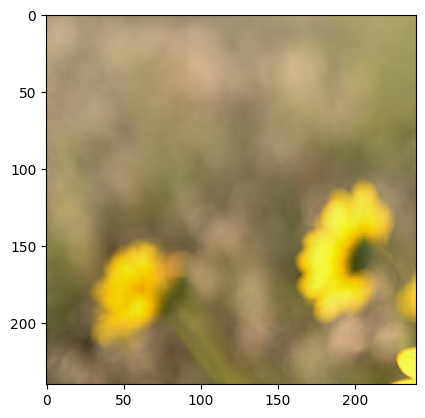

In [15]:
plt.imshow(resized_images[1])

In [16]:
def show_dataset(images, labels):
    # fetch flower label names
    unique_labels = list(set(labels)) 
    # set no. of columns in subplot and image size 
    fig, axes = plt.subplots(len(unique_labels), 6, figsize=(18, 15))
    # set title of the grid
    fig.suptitle("Selected Images from Each Class", fontsize=16)
    # get images of unique labels randomly
    for i, label in enumerate(unique_labels):
        class_images = [img for img, lbl in zip(images, labels) if lbl == label]
        selected_images = random.sample(class_images, min(5, len(class_images)))
        axes[i, 0].text(0.5, 0.5, label, fontsize=14, ha='center', va='center')
        axes[i, 0].axis('off')
        for j, image in enumerate(selected_images):
            axes[i, j+1].imshow(image)
            axes[i, j+1].axis('off')
        # if there are fewer than 5 images in the class, remove the remaining empty subplots
        for k in range(len(selected_images), 5):
            fig.delaxes(axes[i, k])
    plt.tight_layout()
    plt.show()

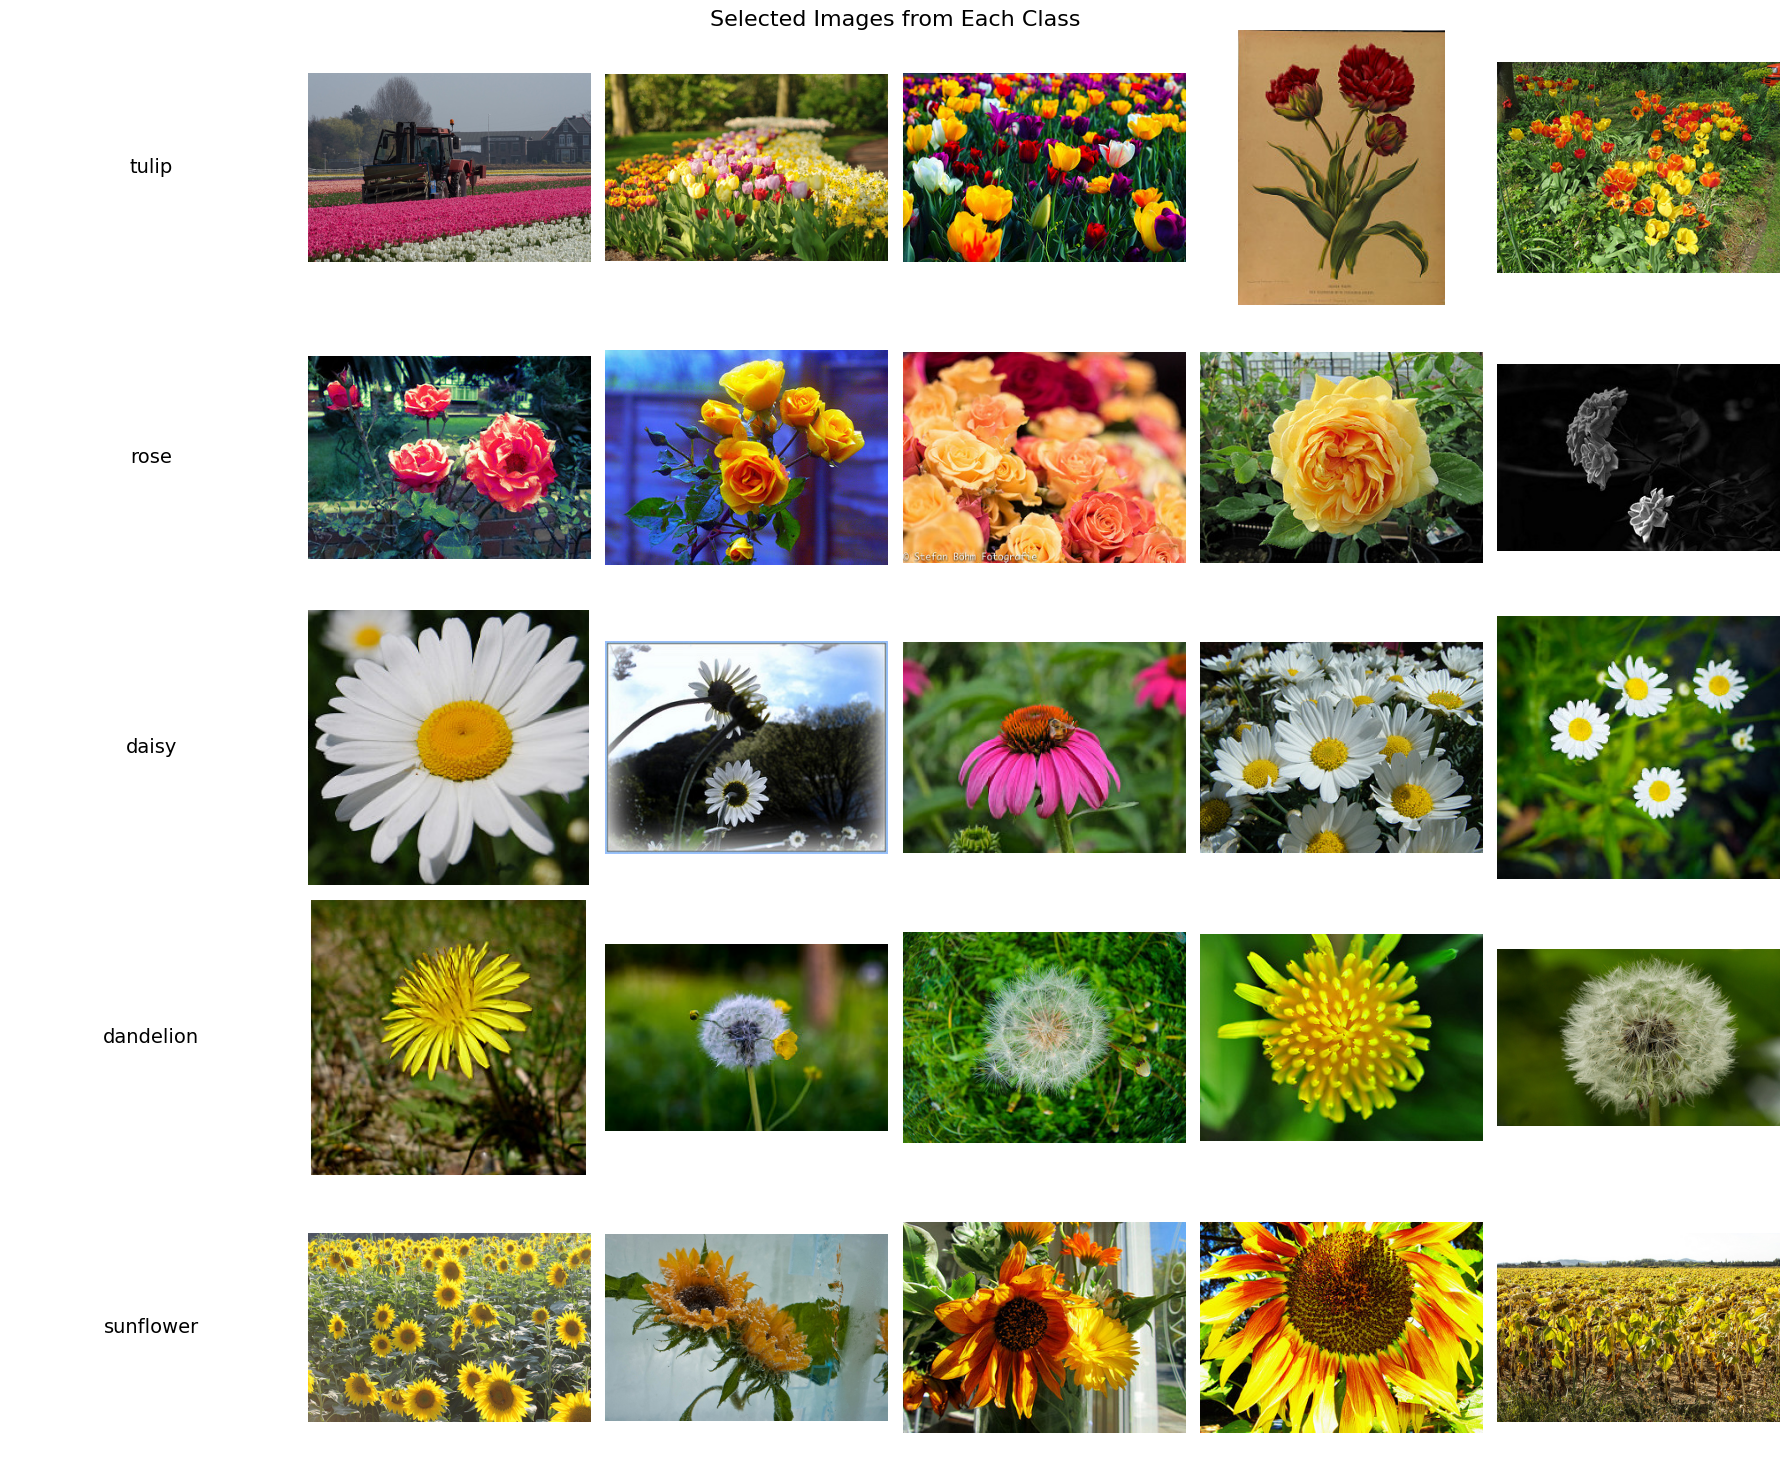

In [19]:
show_dataset(flowers_images, flowers_labels)

In [20]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def thresholding(images):
    binary_images = []
    for image in images:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # Apply binary thresholding
        _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
        
        # Append the binary image to the list
        binary_images.append(binary_image)
        
    return binary_images


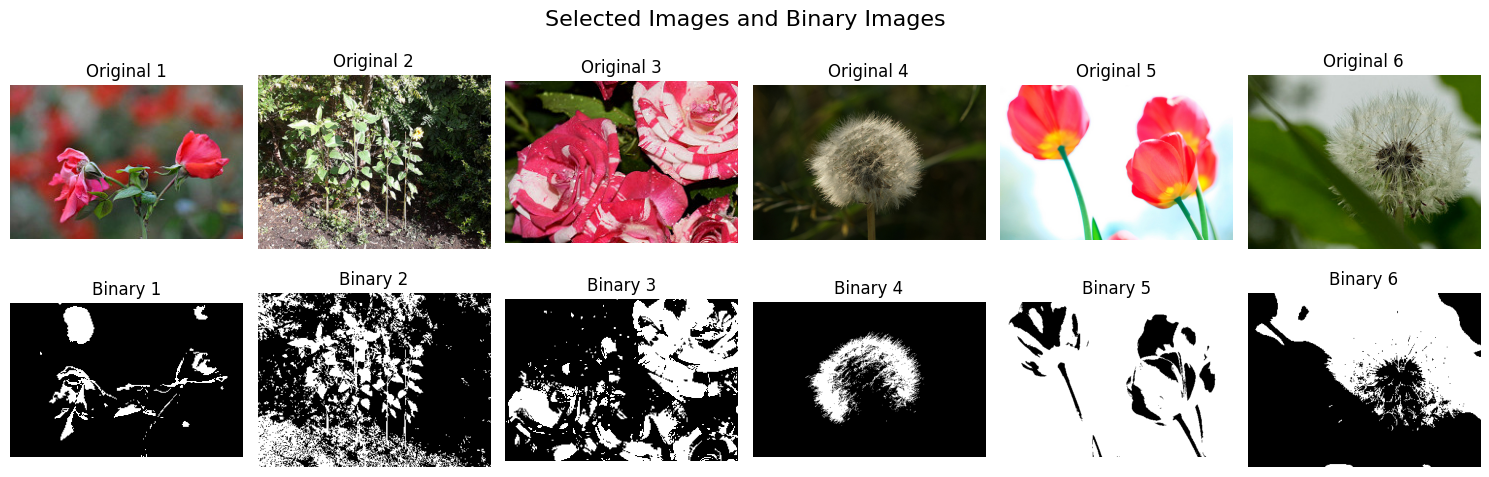

In [21]:
# Assuming you have a list of images called 'flower_images'
selected_images = random.sample(flowers_images, 6)  # Select 6 random images from the dataset

binary_images = thresholding(selected_images)  # Apply thresholding to obtain binary images

# Display the selected images and their binary counterparts in a grid
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)

# Display original images
for i, image in enumerate(selected_images):
    axes[0, i].imshow(image)
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Original {i+1}')

# Display binary images
for i, binary_image in enumerate(binary_images):
    axes[1, i].imshow(binary_image, cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Binary {i+1}')

fig.suptitle('Selected Images and Binary Images', fontsize=16)
plt.tight_layout()
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt

def display_image_and_histogram(images):
    fig, axes = plt.subplots(nrows=2, ncols=len(images), figsize=(12, 8))
    fig.subplots_adjust(hspace=0.4)

    for i, image in enumerate(images):
        # Display the image
        axes[0, i].imshow(image)
        axes[0, i].axis('off')

        # Compute and display the histogram
        hist = np.histogram(image.ravel(), bins=256, range=[0, 256])[0]
        axes[1, i].plot(hist)
        axes[1, i].set_xlim([0, 256])

    # Set titles for the rows
    axes[0, 0].set_ylabel("Image")
    axes[1, 0].set_ylabel("Histogram")

    plt.tight_layout()
    plt.show()


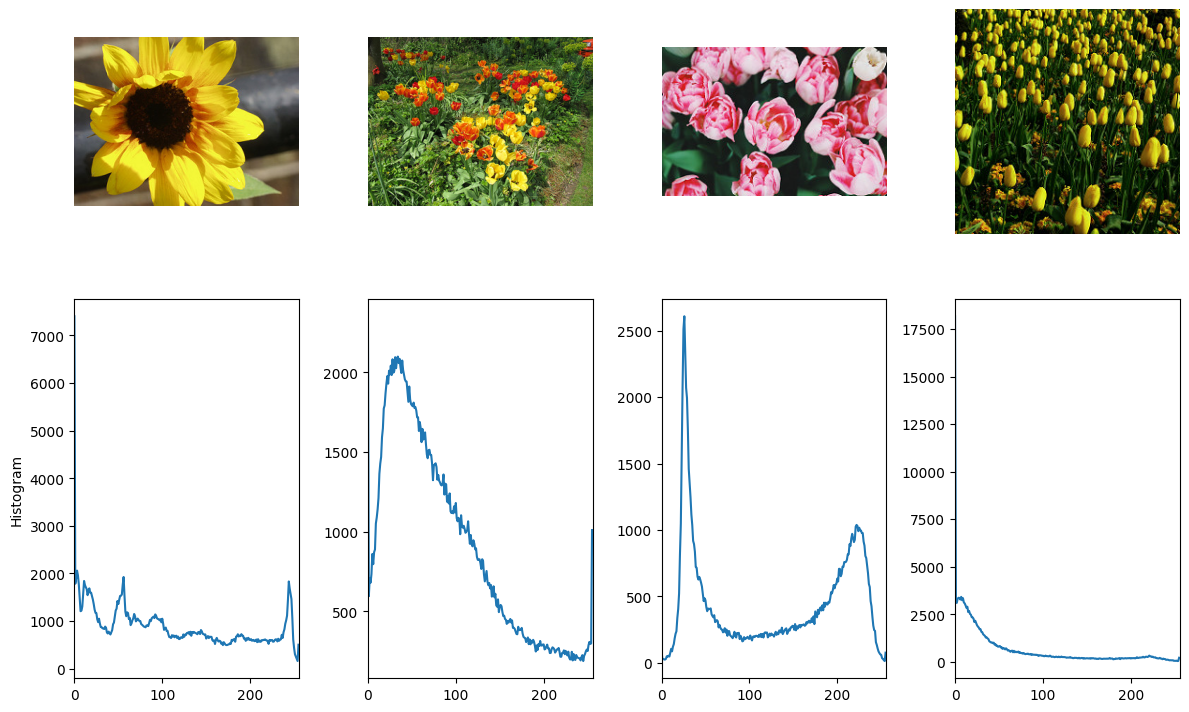

In [23]:
# Assuming you have a list of images called 'dataset'
selected_images = random.sample(flowers_images, 4)  # Select 4 random images from the dataset

display_image_and_histogram(selected_images)  # Display images and histograms


In [26]:
import cv2
import matplotlib.pyplot as plt

def watermarked(image):
    # Load the logo image
    logo = cv2.imread('/content/Namal_Image.png', cv2.IMREAD_UNCHANGED)  # Replace 'logo.png' with the actual path to your logo image

    # Resize the logo to a desired size
    logo_width = 100
    logo_height = 100
    logo_resized = cv2.resize(logo, (logo_width, logo_height))

    # Get the dimensions of the original image
    img_height, img_width, _ = image.shape

    # Calculate the position to place the logo
    logo_position_x = img_width - logo_width - 10  # Adjust the values as needed
    logo_position_y = 10

    # Create a copy of the image
    watermarked_image = image.copy()

    # Overlay the logo on the image
    for c in range(3):
        watermarked_image[logo_position_y:logo_position_y + logo_height, logo_position_x:logo_position_x + logo_width, c] = (
                    logo_resized[:, :, c] * (logo_resized[:, :, 3] / 255.0) +
                    watermarked_image[logo_position_y:logo_position_y + logo_height, logo_position_x:logo_position_x + logo_width, c] *
                    (1.0 - logo_resized[:, :, 3] / 255.0))

    # Display the image with watermark
    plt.imshow(cv2.cvtColor(watermarked_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


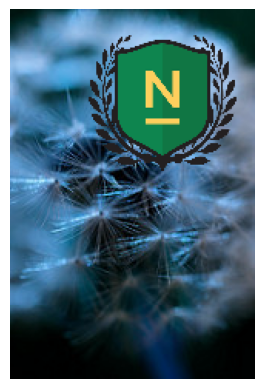

In [27]:
# Assuming you have a list of images called 'flowers_images'
selected_image = random.choice(flowers_images)  # Select a random image from the dataset

watermarked(selected_image)  # Display the image with watermark
